# Exploring and Cleaning Store Sales Forecasting Dataset

#### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [5]:
sales_df = pd.read_csv("stores_sales_forecasting5.csv", encoding="ISO-8859-1")
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
3,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
4,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
1717,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
1718,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
1719,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


## Data Exploration

In [6]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
2,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
3,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.200,3,0.2,15.5250
4,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


In [7]:
sales_df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1711,9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.4300,5,0.30,-143.4310
1712,9929,CA-2016-129630,2016-09-04,2016-09-04,Same Day,IM-15055,Ionia McGrath,Consumer,United States,San Francisco,...,94122,West,FUR-FU-10000260,Furniture,Furnishings,"6"" Cubicle Wall Clock, Black",24.2700,3,0.00,8.7372
1713,9938,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772
1714,9939,CA-2016-169824,2016-12-12,2016-12-17,Standard Class,NS-18640,Noel Staavos,Corporate,United States,New York City,...,10009,East,FUR-FU-10004864,Furniture,Furnishings,Eldon 500 Class Desk Accessories,60.3500,5,0.00,19.9155
1715,9956,CA-2015-141593,2015-12-14,2015-12-16,Second Class,DB-12970,Darren Budd,Corporate,United States,Los Angeles,...,90045,West,FUR-TA-10002622,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",273.5680,2,0.20,10.2588
1716,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
1717,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
1718,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
1719,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
1720,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [8]:
sales_df.shape

(1721, 21)

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         1721 non-null   int64  
 1   Order ID       1721 non-null   object 
 2   Order Date     1721 non-null   object 
 3   Ship Date      1721 non-null   object 
 4   Ship Mode      1721 non-null   object 
 5   Customer ID    1721 non-null   object 
 6   Customer Name  1721 non-null   object 
 7   Segment        1721 non-null   object 
 8   Country        1721 non-null   object 
 9   City           1721 non-null   object 
 10  State          1721 non-null   object 
 11  Postal Code    1721 non-null   int64  
 12  Region         1721 non-null   object 
 13  Product ID     1721 non-null   object 
 14  Category       1721 non-null   object 
 15  Sub-Category   1721 non-null   object 
 16  Product Name   1721 non-null   object 
 17  Sales          1721 non-null   float64
 18  Quantity

### Check the data type

In [10]:
sales_df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [11]:
sales_df.nunique()

Row ID           1721
Order ID         1487
Order Date        817
Ship Date         884
Ship Mode           4
Customer ID       668
Customer Name     668
Segment             3
Country             1
City              348
State              45
Postal Code       427
Region              4
Product ID        366
Category            1
Sub-Category        4
Product Name      371
Sales            1287
Quantity            7
Discount           11
Profit           1417
dtype: int64

In [12]:
sales_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
sales_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [14]:
sales_df['Region'].unique()

array(['South', 'West', 'East', 'Central'], dtype=object)

In [15]:
sales_df['Category'].unique()

array(['Furniture'], dtype=object)

In [16]:
sales_df['Sub-Category'].unique()

array(['Bookcases', 'Furnishings', 'Chairs', 'Tables'], dtype=object)

## Data Cleaning/ preprocessing

### Check Missing Values

In [17]:
sales_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [18]:
sales_df.notnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1717,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1718,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1719,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [19]:
sales_df.dropna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
3,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
4,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
1717,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
1718,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
1719,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


### Remove duplicates

In [20]:
sales_df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
3,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
4,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
1717,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
1718,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
1719,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


### Outliers(Calculations/ Graphs)

#### Before Dropping Quantity Outliers:

<Axes: ylabel='Quantity'>

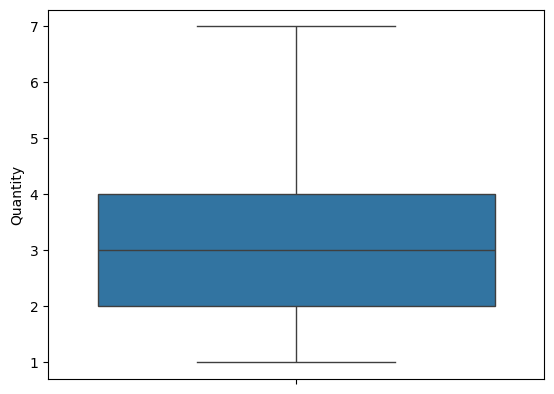

In [21]:
sns.boxplot(data=sales_df['Quantity'])

In [22]:
Q1 = sales_df['Quantity'].quantile(0.25)
Q3 = sales_df['Quantity'].quantile(0.75)
IQR= Q3-Q1
upper_limit= Q3 + 1.5 * IQR
lower_limit= Q1 - 1.5 * IQR
Quantity_outliers = sales_df[(sales_df['Quantity']> upper_limit) | (sales_df['Quantity']< lower_limit)]
Quantity_outliers.count()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Drop Quantity outliers

In [23]:
sales_df = sales_df.drop(Quantity_outliers.index)
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
3,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
4,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
1717,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
1718,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
1719,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


#### After Dropping Quantity Outliers:

<Axes: ylabel='Quantity'>

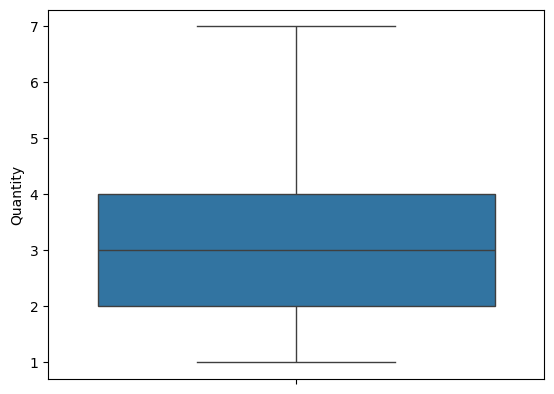

In [24]:
sns.boxplot(data=sales_df['Quantity'])

#### Before Dropping Sales Outliers:

<Axes: ylabel='Sales'>

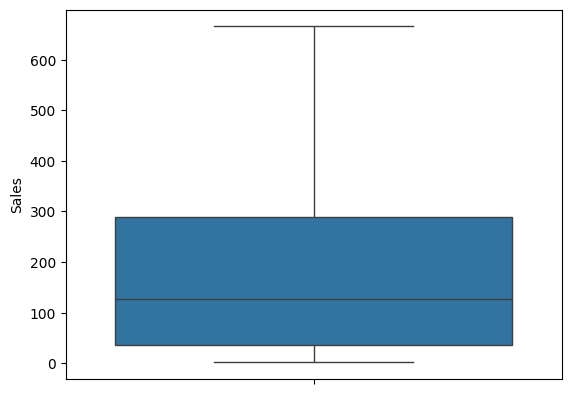

In [25]:
sns.boxplot(data=sales_df['Sales'])

In [26]:
Q1 = sales_df['Sales'].quantile(0.25)
Q3 = sales_df['Sales'].quantile(0.75)
IQR= Q3-Q1
upper_limit= Q3 + 1.5 * IQR
lower_limit= Q1 - 1.5 * IQR
Sales_outliers = sales_df[(sales_df['Sales']> upper_limit) | (sales_df['Sales']< lower_limit)]
Sales_outliers.count()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Drop Sales outliers

#### The outlier removal step was performed iteratively(5 times)to ensure that all extreme sales values were effectively removed, as some outliers persisted after the initial attempts

In [27]:
sales_df = sales_df.drop(Sales_outliers.index)
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
3,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
4,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
1717,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
1718,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
1719,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


#### After Dropping Sales Outliers:

<Axes: ylabel='Sales'>

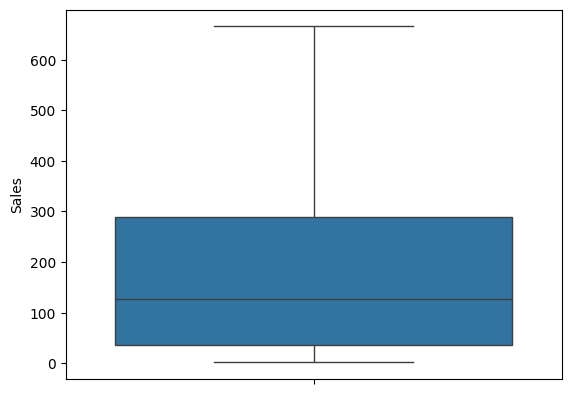

In [28]:
sns.boxplot(data=sales_df['Sales'])

### Data Statistics

In [29]:
sales_df['Postal Code'] = sales_df['Postal Code'].astype(str)

In [30]:
sales_df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,5118.923881,182.475307,3.156886,0.178559,-2.762127
std,2873.132989,172.887574,1.557734,0.187303,67.720662
min,1.000000,1.892000,1.000000,0.000000,-786.744000
25%,2712.000000,35.920000,2.000000,0.000000,-12.058800
50%,5245.000000,127.104000,3.000000,0.200000,6.290500
75%,7592.000000,289.568000,4.000000,0.300000,21.751500
max,9991.000000,665.880000,7.000000,0.700000,297.690000


In [31]:
correlation_df= sales_df[["Sales","Quantity","Discount","Profit"]]
correlation_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.233076,0.063060,-0.086794
Quantity,0.233076,1.000000,0.033236,-0.066854
Discount,0.063060,0.033236,1.000000,-0.602565
Profit,-0.086794,-0.066854,-0.602565,1.000000


### Mapping

#### Mapping is applied after generating data statistics to ensure that date columns (‘Order Date’ and ‘Ship Date’) are not incorrectly treated as categorical variables during the mapping process

In [32]:
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'])

In [33]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

#### Check data types & memory usage after cleaning

In [34]:
sales_df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [35]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1721 non-null   int64         
 1   Order ID       1721 non-null   object        
 2   Order Date     1721 non-null   datetime64[ns]
 3   Ship Date      1721 non-null   datetime64[ns]
 4   Ship Mode      1721 non-null   object        
 5   Customer ID    1721 non-null   object        
 6   Customer Name  1721 non-null   object        
 7   Segment        1721 non-null   object        
 8   Country        1721 non-null   object        
 9   City           1721 non-null   object        
 10  State          1721 non-null   object        
 11  Postal Code    1721 non-null   object        
 12  Region         1721 non-null   object        
 13  Product ID     1721 non-null   object        
 14  Category       1721 non-null   object        
 15  Sub-Category   1721 n

In [36]:
sales_df.to_csv('stores_sales_forecasting5.csv', index=False)
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
3,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
4,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
1717,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
1718,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
1719,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


# Analyzing Store Sales Forecasting Dataset

## 1. Time Series & Forecasting

### Can we predict future sales trends based on historical data?

In [37]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
daily_sales = sales_df.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()
daily_sales['MA_7'] = daily_sales['Sales'].rolling(window=7).mean()
daily_sales['MA_30'] = daily_sales['Sales'].rolling(window=30).mean()

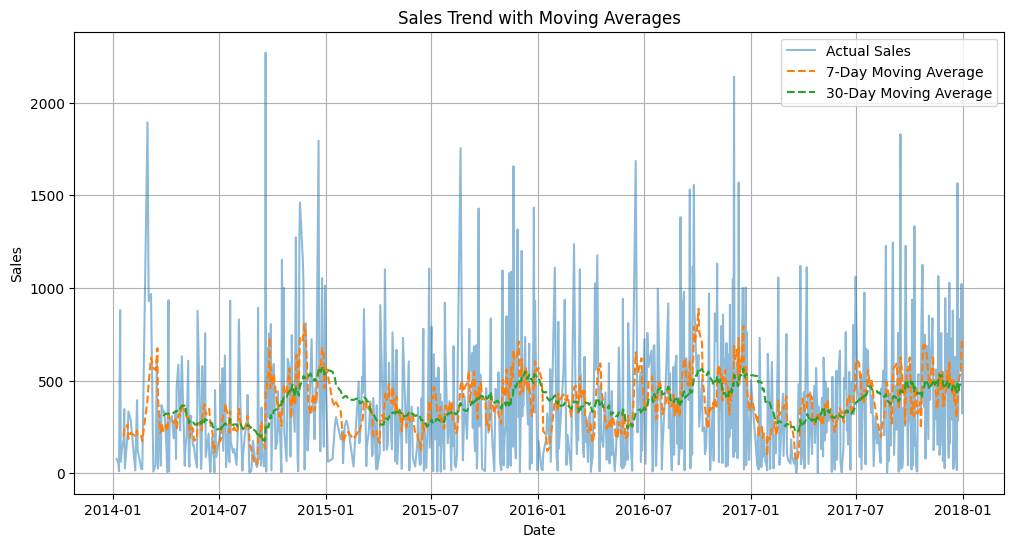

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Actual Sales', alpha=0.5)
plt.plot(daily_sales['Order Date'], daily_sales['MA_7'], label='7-Day Moving Average', linestyle='dashed')
plt.plot(daily_sales['Order Date'], daily_sales['MA_30'], label='30-Day Moving Average', linestyle='dashed')
plt.title("Sales Trend with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

### What are the monthly sales trends over time?

In [39]:
sales_df['Year-Month'] = sales_df['Order Date'].dt.to_period('M')
monthly_sales = sales_df.groupby('Year-Month').agg({'Sales': 'sum'}).reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

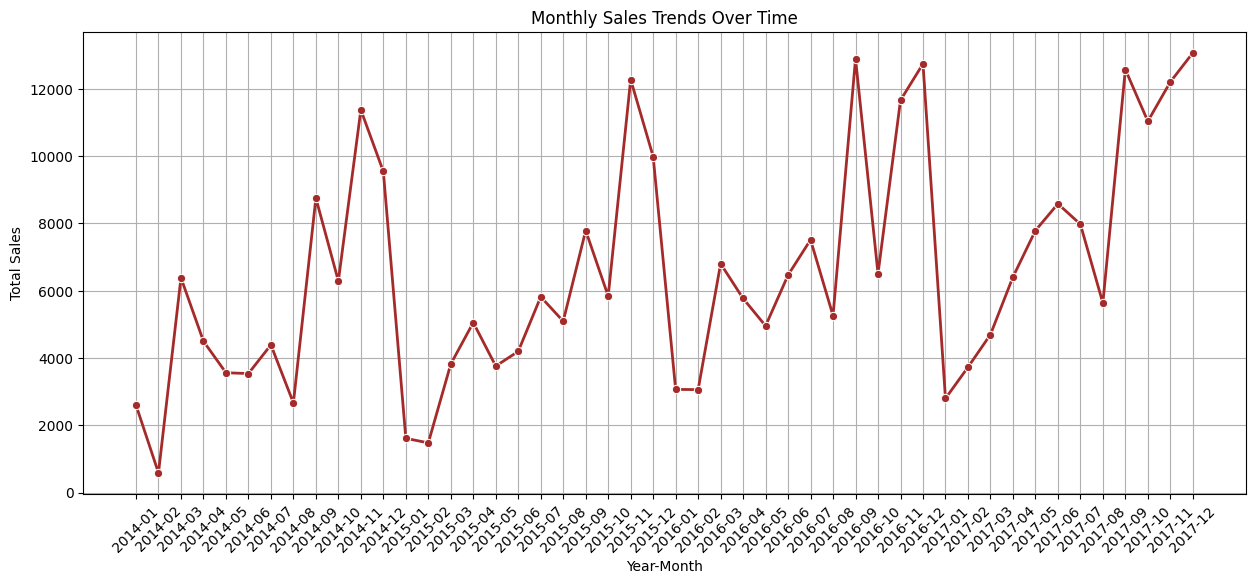

In [40]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year-Month', y='Sales', data=monthly_sales, marker='o', linewidth=2 ,color='brown')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

## 2. Profitability & Discount Impact

### How does the discount impact profit?

In [41]:
Correlation_df= sales_df[["Discount","Profit"]]
print("Correlation between Discount and Profit: ")
Correlation_df.corr()

Correlation between Discount and Profit: 


,Discount,Profit
Discount,1.000000,-0.602565
Profit,-0.602565,1.000000


##### A negative correlation suggests that higher discounts are associated with lower profits.
##### A positive correlation suggests that higher discounts lead to higher profits.

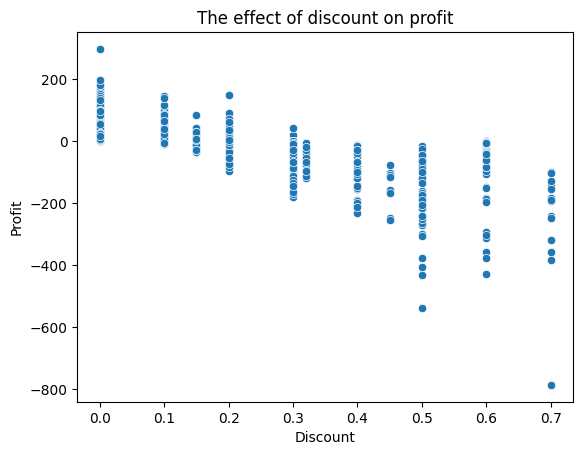

In [42]:
sns.scatterplot(x=sales_df["Discount"], y=sales_df["Profit"])
plt.title("The effect of discount on profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

##### Too many discounts significantly reduce profits.

### Is there a significant difference in sales based on different ship modes?

In [43]:
group_df= sales_df.groupby('Ship Mode')
print("Sales in different Ship Modes:")
group_df.Sales.agg(['mean','min','max','count'])

Sales in different Ship Modes:


,mean,min,max,count
Ship Mode,,,,
First Class,186.434685,1.988,643.136,268
Same Day,164.164400,5.820,630.024,95
Second Class,165.877580,2.328,664.146,345
Standard Class,188.797754,1.892,665.880,1013


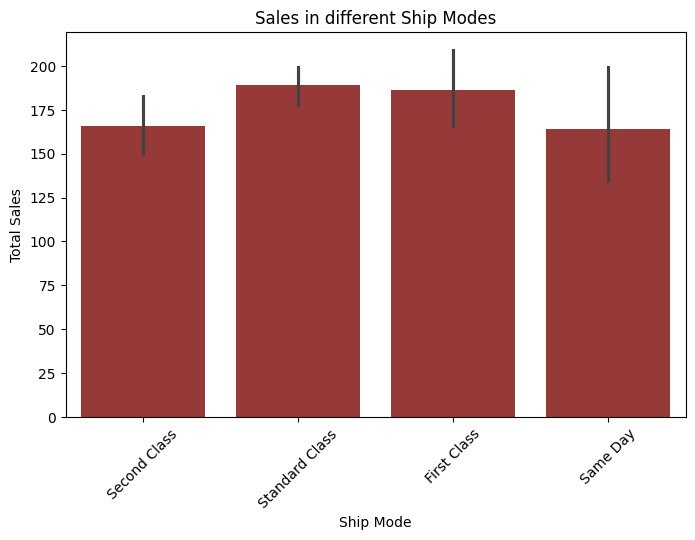

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Ship Mode', y='Sales', data=sales_df , color='brown')
plt.title('Sales in different Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## 3. Customer Segmentation

### What is the average order value per customer segment?

In [45]:
group_df= sales_df.groupby('Segment')
print("Average Order Value Per Customer Segment:")
group_df.Quantity.agg(['mean'])

Average Order Value Per Customer Segment:


,mean
Segment,
Consumer,3.138310
Corporate,3.210526
Home Office,3.121212


# Data Visualisation

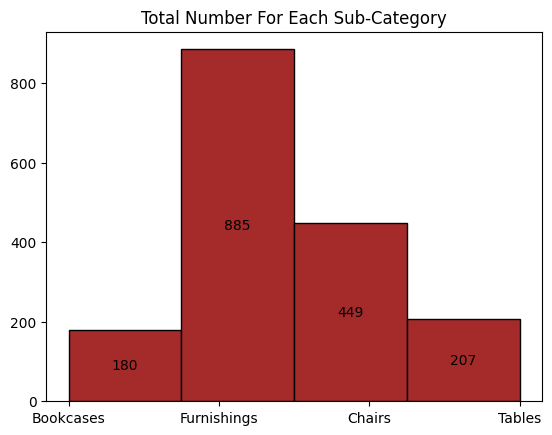

In [46]:
data = sales_df['Sub-Category']
counts, bins, patches = plt.hist(data,bins=4,color='brown',edgecolor='black')
plt.bar_label(patches,labels=[f'{int(c)}' for c in counts], label_type='center')
plt.title("Total Number For Each Sub-Category")
plt.show()

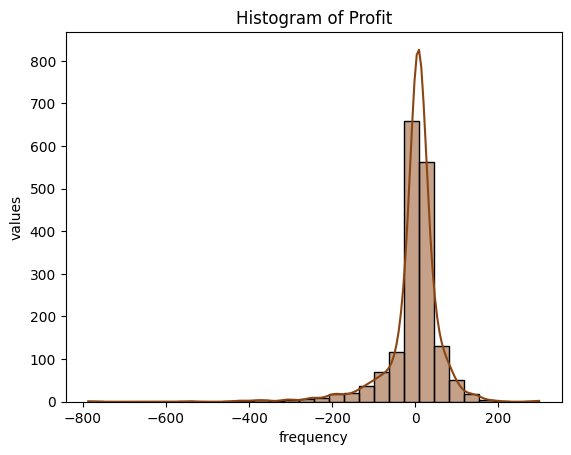

In [55]:
sns.histplot(sales_df["Profit"],bins=30,kde=True , color='saddlebrown')
plt.xlabel("frequency")
plt.ylabel("values")
plt.title("Histogram of Profit")
plt.show()

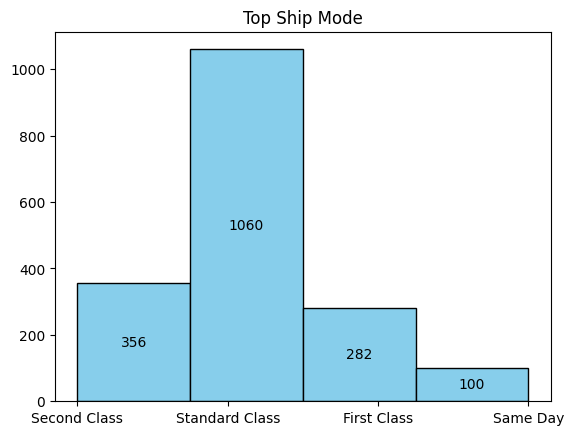

In [51]:
data = sales_df['Ship Mode']
counts, bins, patches = plt.hist(data,bins=4,color='skyblue',edgecolor='black')
plt.bar_label(patches,labels=[f'{int(c)}' for c in counts], label_type='center')
plt.title("Top Ship Mode")
plt.show()